# Associations Between Game Characteristics And Popularity

# Overview

In our project, we investigated the relationships between different features of a Steam game and game ownership. We analyzed each feature's distribution and visualize teir relationship with number of owners. From analysis of these features, we found positive correlations between game ownership and features such as recommendations, and genres. Moreover, we visualized these correlations and computed mathematical correlation equations using quantile regression models. We also created classification models to identify good predictors of game popularity. With these classification models, we are able to predict whether or not a game is popular two-thirds of the time.

# Names

- Nathan Ng
- Melchisedec Lee
- Duy Pham
- Pudan Xu
- Yunchun Pan

# Research Question

How do the features of a Steam game (i.e. genre, platform, price, etc.) affect the popularity of the game, measured by the number of owners? More specifically, we’ll be looking at: 
- Is there an association between the timing of the game’s release and the number of people who own the game?
- Is there an association between the popularity of a game and the number of recommendations they get and the metacritic score they receive?
- Is there an association between the developer’s marketing strategies (i.e number of movies and screenshots) and the popularity of the game?
- Is there an association between the price of a game and its popularity?
- Is there an association between a game’s characteristics (i.e platforms, genres, and categories) and the game’s popularity?
- Can we label the game as being more popular or less popular than average popularity of video games using characteristics of games (release quarter, genres, platforms, and categories) that developers can control?
- Which developer-controllable feature gives the best prediction of popularity of a game?
- Can we create regression models using features that game developers cannot control (i.e metacritic scores, recommendation counts) to reflect and predict a game’s popularity?



## Background and Prior Work

**Why is this question of interest to your group?**

Video games have become an increasingly popular form of entertainment that many have turned to during this current COVID-19 pandemic. While we continue to limit our interactions with others, we noticed that many of our friends and people online have been playing more video games recently. This made us more interested and curious as to why video games have risen in popularity and what makes certain video games more popular than others. 

**What background information led you to your hypothesis?**

Based on our observations of online streaming platforms and current popular games, many of the popular games tend to be multiplayer games. Many of the competitive esports games played in competitions are also action based multiplayer games, like CS:GO and Call of Duty according to The Loadout (https://www.theloadout.com/biggest-esports-games), and that’s why we predicted that multiplayer or action games will have more owners. We also learned that the number of households with computers and internet usage has increased rapidly in the past years, according to the US Census in 2015 (https://www.census.gov/content/dam/Census/library/publications/2017/acs/acs-37.pdf). We believe that because of this increase in accessibility to computers, more recent games will have more owners because less people had access to the game in the past. 

**Why is this important?**

The video game industry has become a significant part in many people’s lives, especially during the pandemic.  As an important source of entertainment, video games have risen in popularity as advancements in technology allow us to play larger, more complex games with better graphics. Video games also gave rise to many creative platforms for not only the developers of games, but also to designers, content creators, and competitions. As found in the WEPC article (https://www.wepc.com/news/video-game-statistics/), video games have resulted in tremendous amounts of profit, reflecting the significance of video games to people around the world. 

**What has already been done on this topic? What is already known?**

A lot of research has already been done on video games, ranging from the rise of popularity in certain genres of games to the effects of video games on adolescents. As shown in the Data Science Central article (https://www.datasciencecentral.com/profiles/blogs/the-growing-popularity-of-multiplayer-online-games), it’s noted that multiplayer online games have grown in popularity. The article from Back2Gaming (https://www.back2gaming.com/reviews/b2g-games/why-online-multiplayer-games-are-so-popular/) also notes the growth in multiplayer video games and attempts to explain the cause behind such trends. Video games are also known to be a source of entertainment for people in many different generations and regions, as shown by ESA (https://www.theesa.com/esa-research/2020-essential-facts-about-the-video-game-industry/). Some research has also suggested that video games help with mental health according to The Guardian (https://www.theguardian.com/games/2020/nov/16/video-gaming-can-benefit-mental-health-find-oxford-academics), and that may also contribute to the popularity of video games. However, not much has been done on what makes video games popular, and in our research we want to explore the different features of a video game to answer that question. 
 
**References:**
- https://www.theloadout.com/biggest-esports-games
- https://www.census.gov/content/dam/Census/library/publications/2017/acs/acs-37.pdf
- https://www.wepc.com/news/video-game-statistics/
- https://www.datasciencecentral.com/profiles/blogs/the-growing-popularity-of-multiplayer-online-games
- https://www.back2gaming.com/reviews/b2g-games/why-online-multiplayer-games-are-so-popular/
- https://www.theesa.com/esa-research/2020-essential-facts-about-the-video-game-industry/
-https://www.theguardian.com/games/2020/nov/16/video-gaming-can-benefit-mental-health-find-oxford-academics 


# Hypothesis


- With more people getting easier access to their own personal computers or laptops, we believe that older games have less owners than recent games. 
- Since popular items or events are often highly recommended and have high scores rated by critics, such as movie ratings, we believe that the more popular a game is, the more recommendations the game has and the higher metacritic score it receives. 
- We believe that the more marketing a game gets, the more popular the game becomes because more people would know about the game and want to play it. 
- We predict that the cheaper a game is, the more popular the game is because people are more likely to spend money on cheaper games rather than make large investments to an expensive video game. 
- Since many of popular games are action-based or strategic multiplayer games, such as Fortnite, Among Us, and League of Legends, we hypothesize that certain genres and categories of games, such as action and multiplayer games, would be more popular than games in other genres and categories. 
- Since many games are only available on Windows and not any other platforms, we predict that the games in our dataset will all run on Windows and that Windows will be the most popularly supported platform for computers.

# Dataset(s)

- Dataset Name: Steam Game Data, games-features.csv
- Link to the dataset: https://data.world/craigkelly/steam-game-data
- Number of observations: 13,357
- The dataset games-features.csv is a dataset containing information about games found on digital game distributor Steam, such as the number of owners, genres, categories, prices, and many other features of the game. It is collected from publicly available Steam API's and steamspy.com. We’ll be using this dataset to get information about video games to answer our research questions. 

# Setup

### Import packages and Load File

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/games-features.csv')

# **Data Cleaning**

### Extract relevant columns
**Release Date** - Date of game release

**Metacritic** - Metacritic score of a game

**Genres** - Genre of a game, includes Indie, Action, Adventure, Casual, Strategy, RPG, Simulation, Early Access, Free to Play, Sports, Racing, and Massively Multiplayer. 

**Recommendation Count** - Number of recommendations for the game

**Is Free** - Whether a game is free

**Free Version Available** - Whether a game has a free version available

**Platform** - The platforms a game can run on, includes Windows, Linux, and Mac

**Categories** - Features a game has, includes Single Player, Multiplayer, Co-op, MMO, In App Purchase, Includes Source SDK, Includes Level Editor, and VR Support

**Movie Count** - The number of movies/videos on a game’s purchase page

**Screenshot Count** - The number of screenshots on a game’s purchase page

**Final Price** - Final price of the game

**SteamSpy Owners** - Number of people who own the game

In [3]:
df = df[['ReleaseDate', 'Metacritic', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
         'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer',
         'RecommendationCount', 'IsFree', 'FreeVerAvail', 'SteamSpyOwners',
         'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'CategorySinglePlayer',
         'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
         'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport',
        'MovieCount','ScreenshotCount', 'PriceFinal']]

**Drop games with 0 owners**

Most games in our dataset with 0 owners were actually unreleased games with a Steam page. We chose to drop the games with 0 owners to only analyze games that were already released and could judge its popularity based on the number of owners. 

**SteamSpyOwnersLog** - A log transformation of the number of owners for each game. 

We applied a log transformation over the number of game owners to create a relatively normal distribution. This allows us to make a better analysis of the popularity of games in Steam, since the counts of owners is heavily right skewed. 

The distribution of the number of owners is extremely right skewed, since there are many games that don't have as many owners as the few really well known games. However, when we apply a log transformation, the distribution is lot closer to being normal, and we can visualize the distribution of number of owners a lot better. 

In [4]:
df = df[df['SteamSpyOwners'] > 0]

df['SteamSpyOwnersLog'] = np.log(df['SteamSpyOwners'])

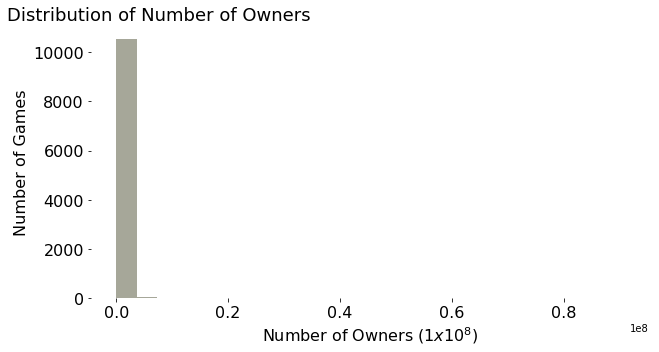

In [5]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df['SteamSpyOwners'], bins=25, kde=False, color='#222500')
plt.title('Distribution of Number of Owners', x= -0.15, loc='left',fontsize = 18)
plt.xlabel('Number of Owners $(1 x 10^8)$', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

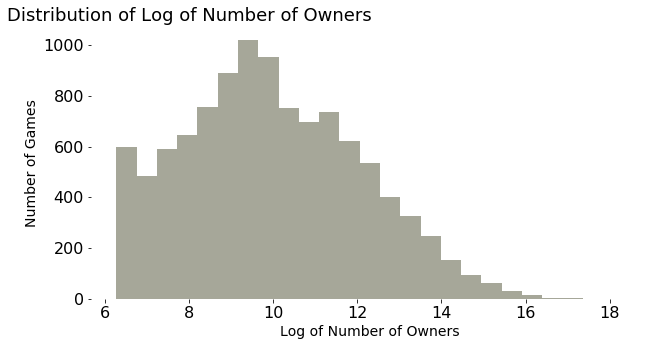

In [6]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df['SteamSpyOwnersLog'], bins=25, kde=False, color='#222500')
plt.title('Distribution of Log of Number of Owners', x= -0.15, loc='left',fontsize = 18)
plt.xlabel('Log of Number of Owners', fontsize = 14)
plt.ylabel('Number of Games', fontsize = 14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

**Drop unreleased games**

**Drop rows that don't contain games**

In addition to games, Steam also contains various types of software for audio, animation, design, and more. Since our focus is only on video games found on Steam, we need to drop non-games from our data. 

In [7]:
df = df.loc[df['ReleaseDate'] != 'Coming Soon']
df = df.loc[df['GenreIsNonGame'] == False]

**Convert ReleaseDate data to a readable date**

**Drop games with unidentifiable release dates and release dates past 2016**

Since our dataset was last updated in 2016, we want to only include games released either before or during 2016. 

In [8]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors = 'coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['ReleaseDate'] < pd.datetime(2017, 1, 1)]

**ReleaseMonth** - Month of game release

**ReleaseYear** - Year of game release

**ReleaseQuarter** - Quarter of game release
- Quarter 1: January - March
- Quarter 2: April - June
- Quarter 3: July - September
- Quarter 4: October - December

In [9]:
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseYear'] = df['ReleaseDate'].dt.year

In [10]:
# function that calculates the quarter when a game is released
def quarter(x):
    if np.isnan(x['ReleaseMonth']):
        return x['ReleaseMonth']
    else:
        val = x['ReleaseMonth'] / 3
        if ((val * 100) %  100 >= 50) | ((val * 100) % 100 == 0):
            return round(val)
        else:
            return round(val) + 1
df['ReleaseQuarter'] = df.apply(quarter, axis = 1)

**We found one game on Steam that was not supported on Windows. Because this is the only game that doesn't support Windows, this is an outlier in our dataset, so we dropped it.**

In [11]:
df[df['PlatformWindows'] == False]

,ReleaseDate,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,...,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,MovieCount,ScreenshotCount,PriceFinal,SteamSpyOwnersLog,ReleaseMonth,ReleaseYear,ReleaseQuarter
1839,2012-09-27,0,False,False,True,False,False,False,False,False,...,False,False,False,1,10,39.99,11.067076,9,2012,3


In [12]:
df = df[df['PlatformWindows'] == True]

# Data Analysis & Results

**releaseMetaGenre_df**: DataFrame with ReleaseDate, Metacritic, SteamSpyOwners, SteamSpyOwnersLog, Genre_cols Columns

In [13]:
releaseMetaGenre_df = df[['ReleaseYear', 'ReleaseMonth', 'ReleaseQuarter', 'Metacritic',
                          'SteamSpyOwners', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
                          'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
                          'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
                          'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'SteamSpyOwnersLog']]

## Release Columns Univariate Analysis

#### Distribution of Release Quarter of Steam Games
We visualized the distribution of steam games' release quarters to see which quarter has more steam games released. From the plot, we found that the third quarter (July-Sept) has the most number of steam games released, while the first quarter (Jan-Mar) has the least number of steam games released.

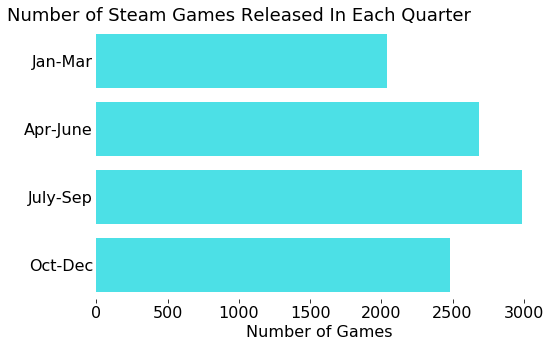

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y=releaseMetaGenre_df['ReleaseQuarter'], color='#33F8FF')
plt.title('Number of Steam Games Released In Each Quarter', x= -0.2, loc='left', fontsize = 18)
plt.xlabel('Number of Games', fontsize = 16)
plt.ylabel('', fontsize = 14)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0)
plt.yticks(ticks=ax.get_yticks(), labels=['Jan-Mar', 'Apr-June', 'July-Sep', 'Oct-Dec'], fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

#### Distribution of Release Month of Steam Games
We visualized the distribution of steam games' release months to see which months have more steam games released. From the plot, we found that more steam games are released between July and October, and less steam games are released in January, Feburary, and December.

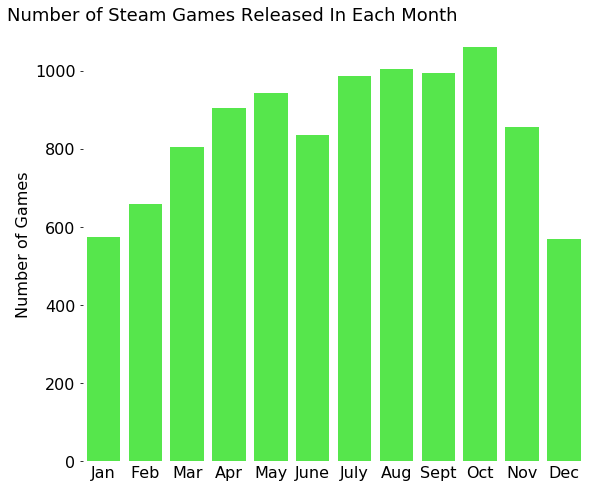

In [15]:
plt.figure(figsize=(9, 8))
ax = sns.countplot(x=releaseMetaGenre_df['ReleaseMonth'], color='#40FF33')
plt.title('Number of Steam Games Released In Each Month', x= -0.15, loc='left', fontsize = 18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both',length=0)
plt.xticks(ticks=ax.get_xticks(), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

#### Distribution of Release Year of Steam Games
We visualized the distribution of steam games' release year to see which years have more steam games released. From the plot, we found that many more games have been released since 2012, particularly 2016, and a few games were released before 2012. 

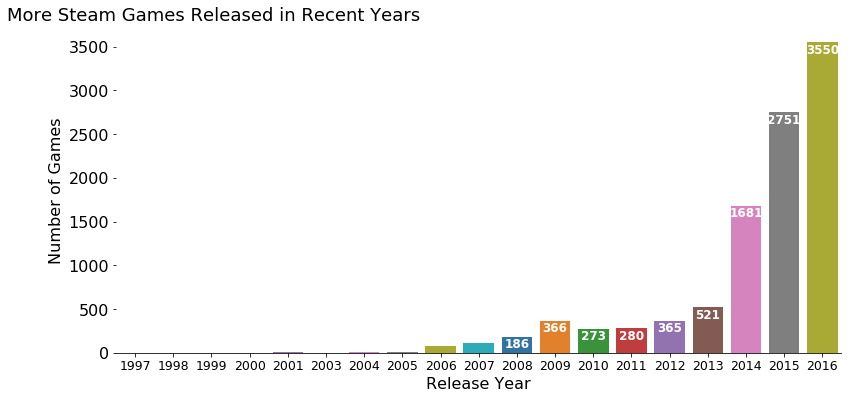

In [16]:
plt.figure(figsize=(13, 6))
ax = sns.countplot(releaseMetaGenre_df['ReleaseYear'], palette=sns.color_palette("tab10"))
plt.title('More Steam Games Released in Recent Years', x= -0.15, loc='left', fontsize = 18)
plt.xlabel('Release Year', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
for index in range(len(ax.patches)):
    if index < 10:
        continue
    p = ax.patches[index]
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 125,
            '{:1.0f}'.format(height),
            ha="center", fontsize = 12, fontweight='bold', color='white') 
ax.tick_params(axis='y', which='both', labelsize=16)
ax.tick_params(axis='x', which='both', labelsize=12.5)
plt.show()

## Release Columns In Relation To Average SteamSpyOwners
We created time-series plots to show how the average number of steam game owners evolved throughout the years, months, and quarters. 

**Evolution Throughout Years**
- Between 1997 and 2000, the average number of steam games owners increased rapidly, but it dropped significantly from 2000 to 2003.
- The average number of steam games owners increased rapidly from 2003 to 2004 and it also dropped significantly from 2004 to 2006.
- The average number of steam games owners stayed relatively low since 2006.
- We believe this is probably because many more games were released since 2006 and hence more intensive competition among games made it harder for games to gain high popularity among players. This could also be caused by the amount of time older games have to accumlate more owners compared to newer games.


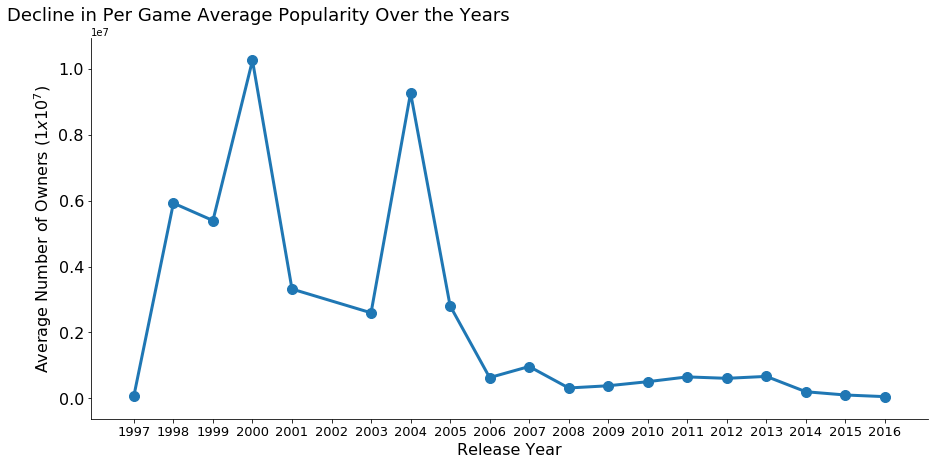

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': np.mean}).index),
                list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': np.mean}).values), linewidth=3)
ax.scatter(list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': np.mean}).index),
                list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': np.mean}).values), s=100)
ax.set_xticks(np.arange(1997, 2017))
plt.title('Decline in Per Game Average Popularity Over the Years', x= -0.1, y = 1.03, loc='left', fontsize = 18)
plt.xlabel('Release Year', fontsize = 16)
plt.ylabel('Average Number of Owners ($1x10^7$)', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', labelsize=16)
ax.tick_params(axis='x', which='both', labelsize=13)
plt.show()

**Evolution Throughout Months**

From plot below, we found that games released in March, July, and November have higher average popularity than games released in other months.

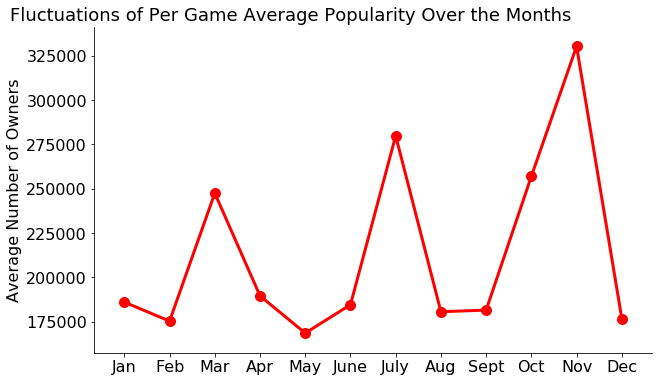

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': np.mean}).index),
                list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': np.mean}).values), linewidth=3
                , color='red')
ax.scatter(list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': np.mean}).index),
                list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': np.mean}).values), s=100, 
                  color='red')
ax.set_xticks(np.arange(1, 13))
plt.xticks(ticks=ax.get_xticks(), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.title('Fluctuations of Per Game Average Popularity Over the Months', x= -0.15,loc='left',fontsize = 18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Average Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

**Evolution Throughout Quarters**

Games released during the fourth quarter (Oct-Dec) have the highest average popularity, while games released during the second quarter (Apr-June) have the lowest average popularity. In addition, games released during the first quarter (Jan-Mar) and the third quarter (July-Sep) have similar average popularity. 

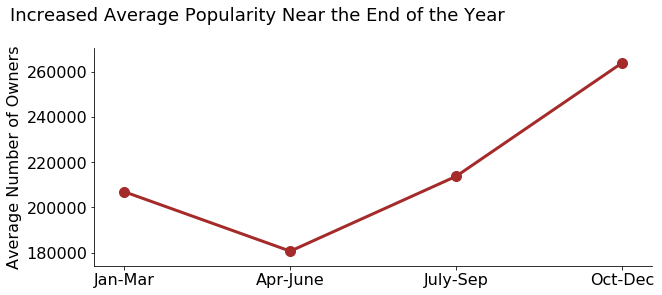

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot((releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': np.mean}).index),
                (releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': np.mean}).values), linewidth=3,
                color='brown')
ax.scatter((releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': np.mean}).index),
                (releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': np.mean}).values), s=100, 
                  color='brown')
ax.set_xticks(np.arange(1, 5))
plt.title('Increased Average Popularity Near the End of the Year', x= -0.15, y = 1.1, loc='left',fontsize = 18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Average Number of Owners', fontsize = 16)
plt.xticks(ticks=ax.get_xticks(), labels=['Jan-Mar', 'Apr-June', 'July-Sep', 'Oct-Dec'], fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', labelsize=16)
plt.show()

### Is there an association between the timing of the game’s release and the number of people who own the game?

In our analysis, we found some trends between the release dates of games and their popularity. As we saw from the plot of the decline in average game popularity over the years, we found that older games have higher average popularity compared to games released more recently. There are also some certain months that have games with higher average popularity, such as March, July, and November. Moreover, we found that the average popularity of games released near the end of the year is higher. Therefore, we believe that release time of games does have some association with its popularity.

## Metacritic Column Univariate Analysis

**releaseMeta_Genre_drop0_df** - DataFrame obtained after dropping games with no metacritic scores (Lowest recoreded metacritic score was 8, so games with a score of 0 in the dataset actually had no metacritic score)

Since most games did not have scores, we decided to create a dataframe with games that had a metacritic score so that the distribution of metacritic scores is more normally distributed.

In [20]:
releaseMeta_Genre_drop0_df = releaseMetaGenre_df.loc[releaseMetaGenre_df['Metacritic'] != 0]

Here, we plotted the histogram and calculated the interquartile of metacritic scores of games. From the plot, we found that most games have a metacritic score between 60 and 88. Moreover, the yellow lines in histogram show that the interquartile of metacritic scores is from approximately 66 to 80.

In [21]:
interquartile = releaseMeta_Genre_drop0_df['Metacritic'].quantile([0.25, 0.75]).tolist()

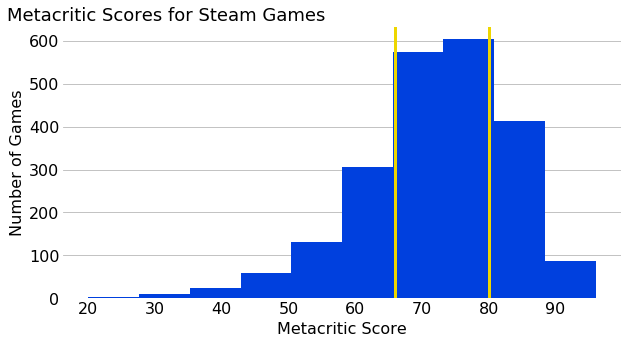

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
releaseMeta_Genre_drop0_df['Metacritic'].plot(kind = 'hist', color='#0040DE')
plt.title('Metacritic Scores for Steam Games', x= -0.1,loc='left',fontsize = 18)
plt.xlabel('Metacritic Score', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
plt.axvline(x = interquartile[0], color='#EDD600', linewidth=3)
plt.axvline(x = interquartile[1], color='#EDD600', linewidth=3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axisbelow(True)
plt.grid(color='#B5B5B5', axis='y', linestyle='solid')
ax.tick_params(axis='both', which='both',length=0)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

## HasMetacritic In Relation To SteamSpyOwnersLog

**HasMetacritic** - (Bool) True if the metacritic score of game is nonzero, otherwise False

In [23]:
releaseMetaGenre_df['HasMetacritic'] = releaseMetaGenre_df['Metacritic'] > 0

We plotted the boxplot to compare the log transformed number of owners of games with and without metacritic scores. The boxplot shows that games with metacritic scores have more number of owners in general.

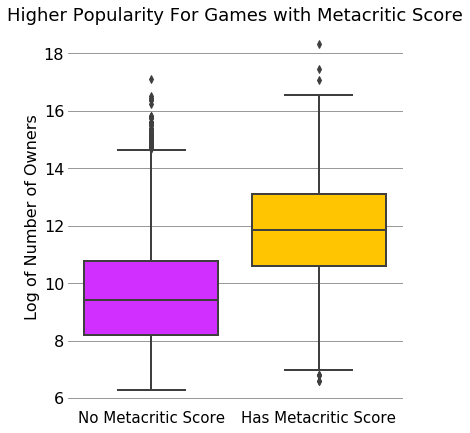

In [24]:
fig, ax = plt.subplots(figsize=(6,7))
sns.boxplot(x="HasMetacritic", y="SteamSpyOwnersLog", data=releaseMetaGenre_df, linewidth=2)
plt.title('Higher Popularity For Games with Metacritic Score', fontsize = 18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='y')
plt.xticks(ticks=ax.get_xticks(), labels=['No Metacritic Score', 'Has Metacritic Score'], fontsize=15)
ax.tick_params(axis='both', which='both',length=0)
plt.yticks(fontsize=14)
ax.artists[0].set_facecolor('#D02FFF')
ax.artists[1].set_facecolor('#FFC500')
ax.tick_params(axis='y', which='both', labelsize=16)
plt.show()

## Is there an association between the popularity of a game and the metacritic score they receive?
The scatterplot below shows the log number of owners of games with different metacritic scores. From the plot, we found that these metacritic and average log number of owners are only slightly positively associated.

In [25]:
metacritic_df = df[df['Metacritic'] > 0]

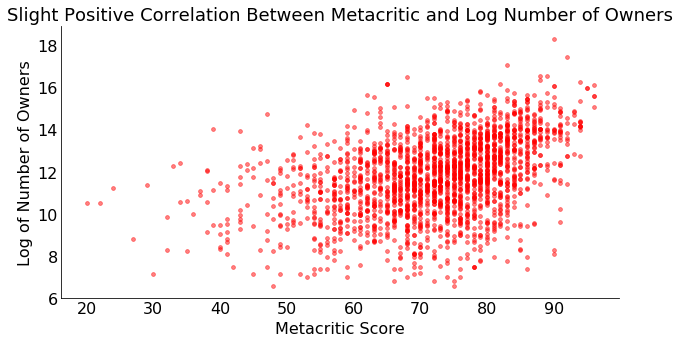

In [26]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Metacritic', y='SteamSpyOwnersLog', data=metacritic_df, s=15, color='red', edgecolor = None, alpha = 0.5)
plt.title('Slight Positive Correlation Between Metacritic and Log Number of Owners', fontsize=18)
plt.xlabel('Metacritic Score', fontsize = 16)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.show()

# **Recommendation Count Univariate Analysis**

**Distribution of RecommendationCount**

We visualized the distribution of number of recommendations to see how many games were highly recommended. From our plot, we found that while many games have a moderate amount of recommendations (bins 0.0-0.06), there are some games that have drastically more recommendations than other games. 

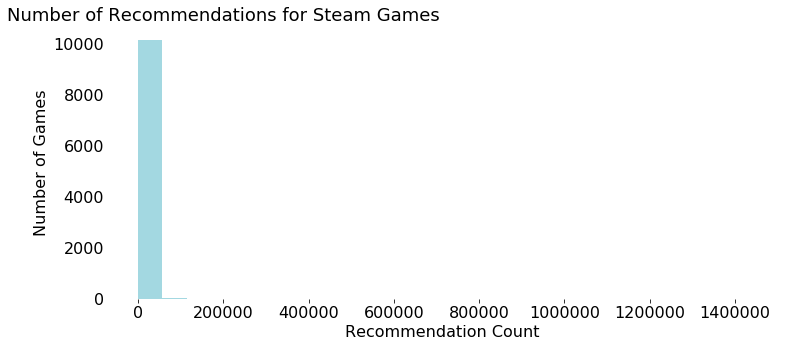

In [95]:
plt.figure(figsize=(12,5))
ax = sns.distplot(df['RecommendationCount'], bins=25, kde=False, color='#199EB4')
plt.title('Number of Recommendations for Steam Games',x= -0.15,loc='left', fontsize = 18)
plt.xlabel('Recommendation Count', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

**Drop games with 0 recommendations**

This allows us to take the log of RecommendationCount and analyze the distribution.

**Create column of the log transformation of RecommendationCount**

**RecommendationCountLog** - float, natural log transformation of RecommendationCount

In [28]:
recommendation_log_df = df[df['RecommendationCount'] > 0]
recommendation_log_df['RecommendationCountLog'] = np.log(recommendation_log_df['RecommendationCount'])

**Distribution of RecommendationCountLog**

We visualized the log distribution of RecommendationCount with the following plot. From the graph, we found that the distribution is heavily right skewed, with many games having low amounts of recommendations. However, this distribution is much more visible than the distribution of the raw counts of recommendations. 

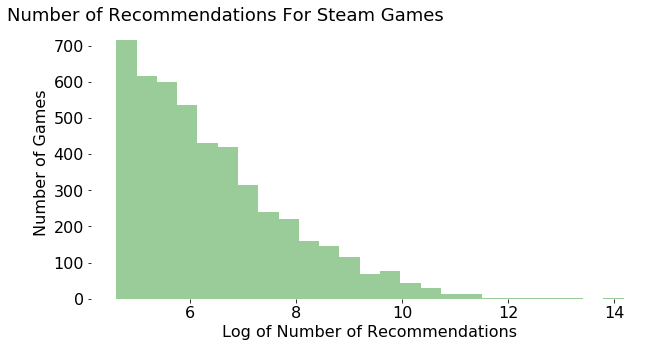

In [29]:
plt.figure(figsize=(10,5))
ax = sns.distplot(recommendation_log_df['RecommendationCountLog'], bins=25, kde=False, color='green')
plt.title('Number of Recommendations For Steam Games', x= -0.15,loc='left',fontsize = 18)
plt.xlabel('Log of Number of Recommendations', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

## Is there an association between the popularity of a game and the number of recommendations they get?

We created a scatter plot to show the relationship between the log transformation of RecommendationCount and SteamSpyOwners. 

**More Recommendations and More Owners**

In the plot, we found that there is a positive correlation between the log of RecommendationCount and the log of SteamSpyOwners. This means that games with more owners generally have more recommendations and vice versa.

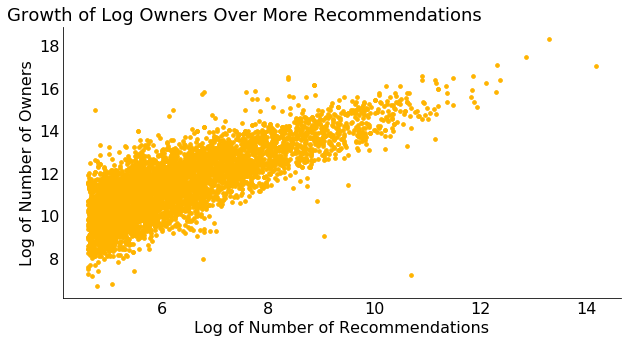

In [30]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='RecommendationCountLog', y='SteamSpyOwnersLog', data=recommendation_log_df, s=15, color='#FFB400',
                     edgecolor = None)
plt.title('Growth of Log Owners Over More Recommendations', x= -0.1,loc='left',fontsize=18)
plt.xlabel('Log of Number of Recommendations', fontsize = 16)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.show()

## Genre Columns Univariate Analysis

In [31]:
genre_cols = ['GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
              'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
              'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
              'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer']

**Counts the number of games of each genre**

In [32]:
lst = []
for col in genre_cols:
    lst.append(pd.DataFrame(releaseMetaGenre_df[col].value_counts()))
genre_game_counts = pd.DataFrame(pd.concat(lst, axis = 1)).T[True]

Here, we plotted the number of games of each genre. The plot shows that most games fall under the genres Indie, Action, and Adventure, while a few games fall under the genres Sports, Racing, and Massively Multiplayer.

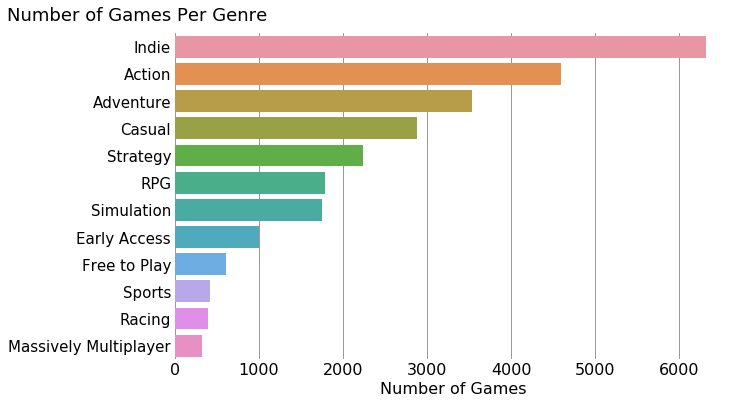

In [33]:
plt.figure(figsize=(10,6))
ax = sns.barplot(genre_game_counts.values, genre_game_counts.index, orient = 'h')
plt.xlabel("Number of Games", fontsize = 16) 
plt.ylabel("", fontsize = 14) 
plt.title("Number of Games Per Genre",x= -0.3, y = 1.02, loc='left',fontsize = 18) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='x')
plt.yticks(ticks=ax.get_yticks(), labels=['Indie', 'Action', 'Adventure', 'Casual', 'Strategy', 'RPG', 
                                          'Simulation', 'Early Access', 'Free to Play', 'Sports', 
                                          'Racing', 'Massively Multiplayer'], fontsize=15)
bars = ax.patches
colors = ['#e996a3', '#e29153', '#b79c49', '#98a245', '#60ae47', '#4aae8a', '#4aaba3', '#4fabbc', '#6eade2', 
          '#b6a8eb', '#df8fe7', '#e890c5']
for i in range(len(bars)):
    bars[i].set_facecolor(colors[i])
ax.tick_params(axis='x', which='both', labelsize=16)
plt.show()

## Is there an association between a game’s genres and the game’s popularity?

**Average the number of owners of games of each genre**

In [34]:
dic = {}
for col in genre_cols:
    dic[col] = [releaseMetaGenre_df.loc[releaseMetaGenre_df[col]]['SteamSpyOwners'].mean()]
genre_owners_mean = pd.DataFrame(dic, index = ['Mean']).T['Mean'].sort_values(ascending = False)

The plot below shows that free games has the highest average popularity among players, which is followed by action, RPG, strategy games. Moreover, racing, indie, and casual games have a lower average popularity among players. 

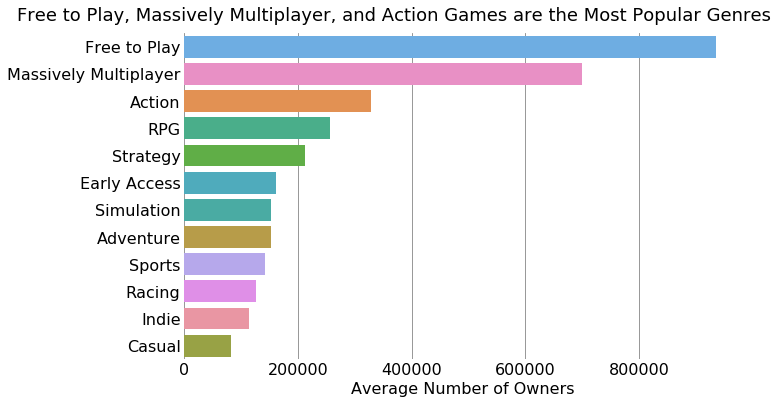

In [35]:
plt.figure(figsize=(10,6))
ax = sns.barplot(genre_owners_mean.values, genre_owners_mean.index, orient = 'h')
plt.xlabel("Average Number of Owners", fontsize = 16) 
plt.ylabel("", fontsize = 14)
plt.title("Free to Play, Massively Multiplayer, and Action Games are the Most Popular Genres",
          x= -0.3,y = 1.02, loc='left',fontsize = 18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='x')
plt.yticks(ticks=ax.get_yticks(), labels=['Free to Play', 'Massively Multiplayer', 'Action', 'RPG', 'Strategy', 
                                          'Early Access', 'Simulation', 'Adventure', 'Sports', 'Racing', 'Indie', 
                                          'Casual'], fontsize=16)
bars = ax.patches
colors = ['#6eade2', '#e890c5', '#e29153', '#4aae8a', '#60ae47', '#4fabbc', '#4aaba3', '#b79c49', '#b6a8eb', 
          '#df8fe7', '#e996a3', '#98a245']
for i in range(len(bars)):
    bars[i].set_facecolor(colors[i])
plt.show()

# **IsFree In Relation to SteamSpyOwnersLog**

We created a box plot of the number of owners of free and non-free games to show the correlation between whether a game is free and its popularity. 

From the boxplots, we found that free games had more owners than non-free games. In both free and non-free games, there were some outliers. The median log of SteamSpyOwners of free games is 11.8, which is around 135,000 owners, and 9.632 for non-free games, which is around 15,000 owners.  

In other words, free games tend to have more owners than non-free games. This is probably because free games don't cost the owners and may motivate more people to try out and own the game. 

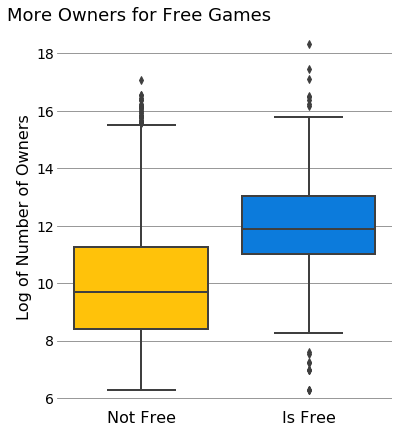

In [36]:
plt.figure(figsize=(6,7))
ax = sns.boxplot(x='IsFree', y='SteamSpyOwnersLog', data=df, linewidth=2)
plt.title('More Owners for Free Games', x= -0.15,loc='left',fontsize=18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='y')
plt.xticks(ticks=ax.get_xticks(), labels=['Not Free', 'Is Free'])
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.yticks(fontsize=14)
ax.artists[0].set_facecolor('#FFC20A')
ax.artists[1].set_facecolor('#0C7BDC')
plt.show()

# **FreeVerAvail In Relation To SteamSpyOwnersLog**

We created a boxplot of the number of owners for games with and without a free version. 

From the plot, we found that games with a free version generally have more owners than most games without a free version. However, the boxplot shows that around 25% of games without a free version had more owners than games with a free version. The median of log owners for games with a free version is around 12.58 or 292,500 owners, while the median for games without a free version is around 9.8 or 18,000 owners. 

Since the variance is so large for games without a free version, it is difficult to determine whether a game will be popular based solely on the availability of a free version. 

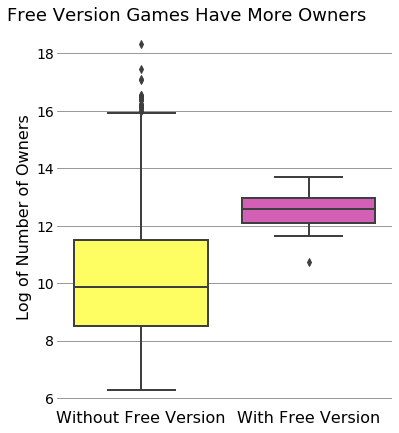

In [37]:
plt.figure(figsize=(6,7))
ax = sns.boxplot(x='FreeVerAvail', y='SteamSpyOwnersLog', data=df, linewidth=2)
plt.title('Free Version Games Have More Owners', x= -0.15,loc='left', fontsize=18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='y')
plt.xticks(ticks=ax.get_xticks(), labels=["Without Free Version", "With Free Version"])
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.yticks(fontsize=14)
ax.artists[0].set_facecolor('#FEFE62')
ax.artists[1].set_facecolor('#D35FB7')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

## Platform Columns Univariate Analysis

In [38]:
dfPlatforms = df[['PlatformWindows', 'PlatformLinux', 'PlatformMac', 'SteamSpyOwners', 'SteamSpyOwnersLog']]

**Create new column NumPlatforms that is the number of platforms the game supports**

In [39]:
dfPlatforms['NumPlatforms'] = dfPlatforms['PlatformWindows'].astype(int) + dfPlatforms['PlatformLinux'].astype(int) + dfPlatforms['PlatformMac'].astype(int)

**Number of games supporting each platform**

All games in the dataset support Windows. A portion of these games also support Linux and Mac.

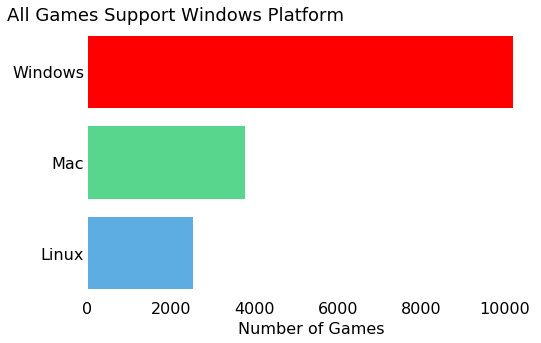

In [40]:
plt.figure(figsize=(8,5))
ax = sns.barplot([dfPlatforms['PlatformWindows'].sum(), dfPlatforms['PlatformMac'].sum(), dfPlatforms['PlatformLinux'].sum()],
           ['Windows', 'Mac', 'Linux'])
plt.title('All Games Support Windows Platform', x= -0.18,loc='left',fontsize = 18)
plt.ylabel('', fontsize = 14)
plt.xlabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.yticks(ticks=ax.get_yticks(), fontsize=16)
ax.patches[0].set_facecolor('#FF0000')
ax.patches[1].set_facecolor('#58D68D')
ax.patches[2].set_facecolor('#5DADE2')
plt.show()

**Number of owners of games of each platform**

Games that support Linux in addition to Windows have the highest average number of owners, followed by games supporting Mac and Windows. 

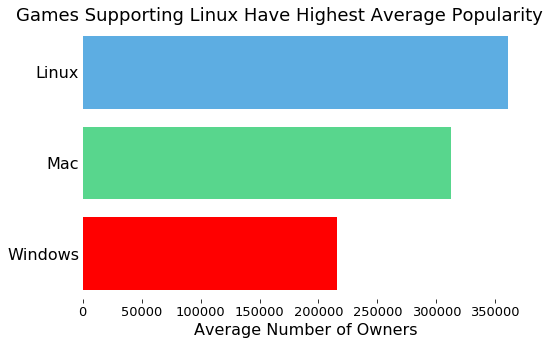

In [41]:
fig = plt.figure(figsize = (8, 5))
ax = sns.barplot([dfPlatforms[dfPlatforms['PlatformLinux'] == True]['SteamSpyOwners'].mean(),
             dfPlatforms[dfPlatforms['PlatformMac'] == True]['SteamSpyOwners'].mean(),
            dfPlatforms[dfPlatforms['PlatformWindows'] == True]['SteamSpyOwners'].mean()], ['Linux', 'Mac', 'Windows'])
plt.title('Games Supporting Linux Have Highest Average Popularity', x= -0.15,loc='left',fontsize = 18)
plt.ylabel('', fontsize = 14)
plt.xlabel('Average Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0, labelsize=16)
ax.tick_params(axis='x',labelsize=13)
plt.yticks(ticks=ax.get_yticks())
ax.patches[0].set_facecolor('#5DADE2')
ax.patches[1].set_facecolor('#58D68D')
ax.patches[2].set_facecolor('#FF0000')
plt.show()

## Is there an association between platforms the game supports and the game’s popularity?

By checking the three boxplots below, we found that the median log number of owners of games is similar across all platforms. This means there is no correlation between the platforms a game supports and its popularity. 

The differences seen in the mean could be caused by a few outliers, which doesn't greatly affect the median in the boxplots. 

#### Boxplot for PlatformLinux

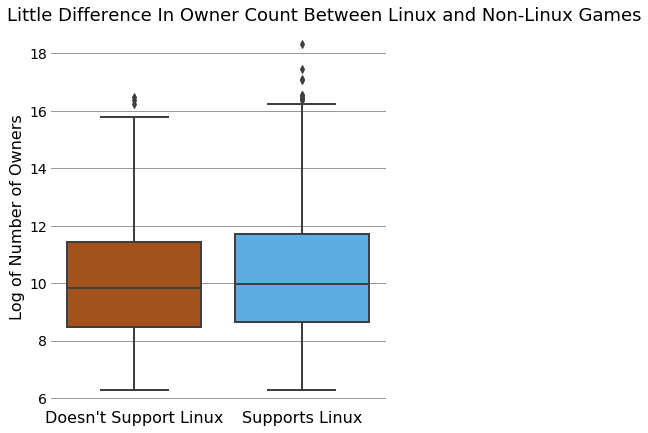

In [42]:
plt.figure(figsize=(6,7))
ax = sns.boxplot(x='PlatformLinux', y='SteamSpyOwnersLog', data=dfPlatforms, linewidth=2)
plt.title('Little Difference In Owner Count Between Linux and Non-Linux Games',x= -0.13,loc='left', fontsize=18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='y')
plt.xticks(ticks=ax.get_xticks(), labels=["Doesn't Support Linux", "Supports Linux"], fontsize=16)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.yticks(fontsize=14)
ax.artists[0].set_facecolor('#A2521D')
ax.artists[1].set_facecolor('#5DADE2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

#### Boxplot for PlatformMac

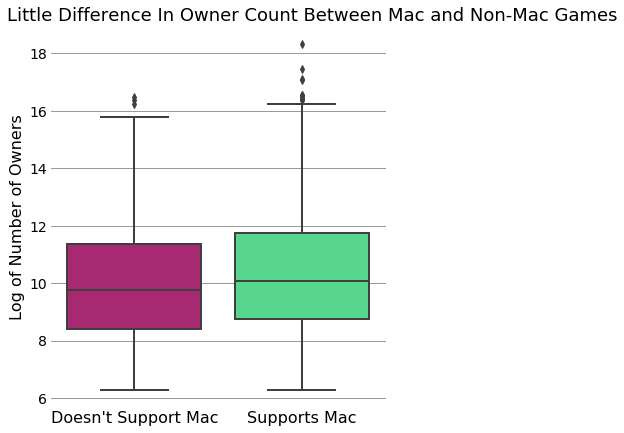

In [43]:
plt.figure(figsize=(6,7))
ax = sns.boxplot(x='PlatformMac', y='SteamSpyOwnersLog', data=dfPlatforms, linewidth=2)
plt.title('Little Difference In Owner Count Between Mac and Non-Mac Games', x= -0.13,loc='left',fontsize=18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='y')
plt.xticks(ticks=ax.get_xticks(), labels=["Doesn't Support Mac", "Supports Mac"], fontsize=16)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.yticks(fontsize=14)
ax.artists[0].set_facecolor('#A72972')
ax.artists[1].set_facecolor('#58D68D')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

#### Boxplot for NumPlatforms

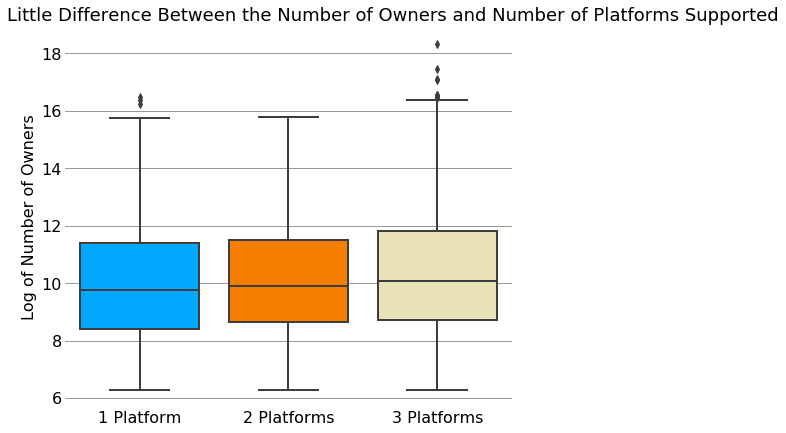

In [44]:
plt.figure(figsize=(8,7))
ax = sns.boxplot(x='NumPlatforms', y='SteamSpyOwnersLog', data=dfPlatforms, linewidth=2)
plt.title('Little Difference Between the Number of Owners and Number of Platforms Supported', x= -0.13,loc='left',
          fontsize=18)
plt.xlabel('', fontsize = 14)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='y')
plt.xticks(ticks=ax.get_xticks(), labels=['1 Platform', '2 Platforms', '3 Platforms'], fontsize=16)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
ax.artists[0].set_facecolor('#00A8FF')
ax.artists[1].set_facecolor('#f77f00')
ax.artists[2].set_facecolor('#eae2b7')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

# Category Columns Univariate Analysis

In [45]:
category_cols = ['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 
               'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 
               'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'SteamSpyOwners', 'SteamSpyOwnersLog']
category_df = df[category_cols]

In [46]:
lst = []
for col in category_cols[:-2]:
    lst.append(pd.DataFrame(category_df[col].value_counts()))
category_game_counts = pd.concat(lst, axis = 1).T[True].sort_values(ascending = False)

We plotted the number of games for each category. Most of the games are Single Player or Multiplayer, while there are much fewer games in all of the other categories. A possible reason for why Single Player and Multiplayer have a lot of games is that single player and multiplayer games cover all the possible types of games (there are no 0 player games). Since VR is a new technology, it is reasonable that not many games use this technology, and hence there are very few VR supported games. 

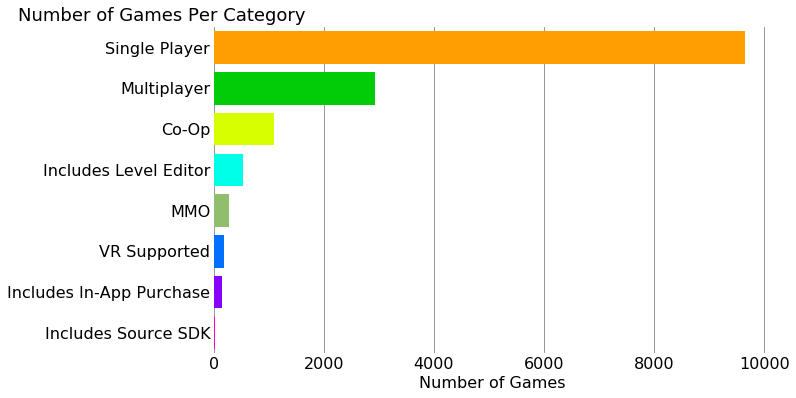

In [47]:
plt.figure(figsize=(10,6))
ax = sns.barplot(category_game_counts.values, category_game_counts.index, orient = 'h')
plt.xlabel("Number of Games", fontsize = 16) 
plt.ylabel("", fontsize = 14) 
plt.title("Number of Games Per Category",x= -0.35,loc='left',fontsize = 18) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='x')
plt.yticks(ticks=ax.get_yticks(), labels=['Single Player', 'Multiplayer', 'Co-Op', 'Includes Level Editor',
                                         'MMO', 'VR Supported', 'Includes In-App Purchase', 'Includes Source SDK'])
bars = ax.patches
colors = ['#FF9E00', '#00CD07', '#D7FF00', '#00FFE9', '#90be6d', '#0071FF', '#8500FF', '#FF00BF']
for i in range(len(bars)):
    bars[i].set_facecolor(colors[i])
plt.show()

# Is there an association between a game’s categories and the game’s popularity?


**Average the number of owners of games of each category**

In [48]:
dic = {}
for col in category_cols[:-2]:
    dic[col] = [category_df.loc[category_df[col]]['SteamSpyOwners'].mean()]
category_owners_mean = pd.DataFrame(dic, index = ['Mean']).T['Mean'].sort_values(ascending = False)

Next, we plotted the average popularity of games that falls under each category. Games that include Source SDK, or games that are run on the Source engine, have the highest average popularity. On the other hand, Single Player games have the lowest average popularity among players. One reason for why games that include Source SDK have high average popularity is that around half of the games with Source SDK have a large number of owners, and two of the games have the highest number of owners which heavily bias the average to be greater. 

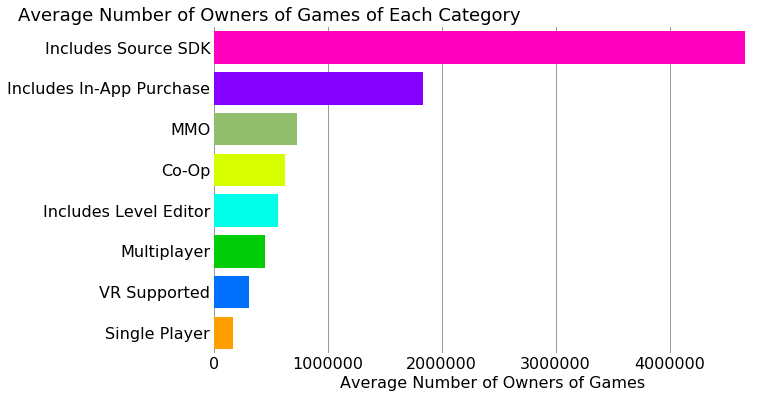

In [49]:
plt.figure(figsize=(10,6))
ax = sns.barplot(category_owners_mean.values, category_owners_mean.index, orient = 'h')
plt.xlabel("Average Number of Owners of Games", fontsize = 16) 
plt.ylabel("", fontsize = 16)
plt.title("Average Number of Owners of Games of Each Category",x= -0.35,loc='left', fontsize = 18) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
ax.set_axisbelow(True)
plt.grid(color='gray', axis='x')
plt.yticks(ticks=ax.get_yticks(), labels=['Includes Source SDK', 'Includes In-App Purchase', 'MMO', 'Co-Op', 
                                          'Includes Level Editor', 'Multiplayer', 'VR Supported', 'Single Player'])
bars = ax.patches
colors = ['#FF00BF', '#8500FF', '#90be6d', '#D7FF00', '#00FFE9', '#00CD07', '#0071FF', '#FF9E00']
for i in range(len(bars)):
    bars[i].set_facecolor(colors[i])
plt.show()

## MovieCount Univariate Analysis

In [50]:
MovieScreenshotPrice_df = df[['MovieCount','ScreenshotCount',
                              'PriceFinal','SteamSpyOwners', 'SteamSpyOwnersLog']]
#drop MovieCount = 0
df_drop0_mov = MovieScreenshotPrice_df[MovieScreenshotPrice_df['MovieCount'] > 0]

We plotted the number of games correspondent to the number of movies displayed on the Steam website. The plot shows that most games in the dataset have 2 to 3 movies on their respective websites. The distribution of the number of movies is heavily skewed to the right, because there are some games that have 16 movies, and a game with 20 movies. 

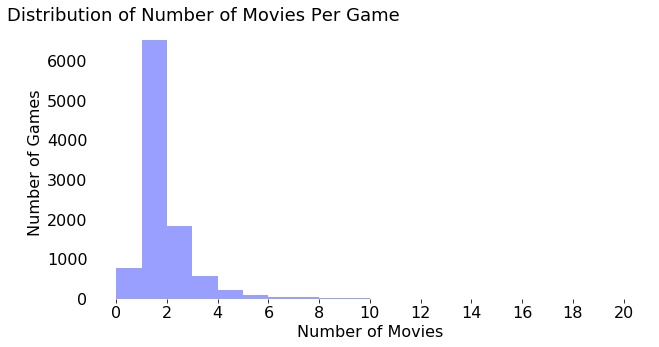

In [51]:
plt.figure(figsize=(10,5))
ax = sns.distplot(MovieScreenshotPrice_df['MovieCount'], bins=20, kde=False, color='#000FFF')
plt.title('Distribution of Number of Movies Per Game', x= -0.15,loc='left', fontsize = 18)
plt.xlabel('Number of Movies',fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0)
ax.tick_params(axis='both', which='both', labelsize=16)

ax.set_xticks(range(0, 21, 2))
ax.set_xticklabels(range(0, 21, 2))

plt.show()

## Is there an association between the number of movies and the popularity of the game?

We use a scatterplot to visualize the relationship between the number of owners and the number of movies a game has. For games with fewer than 10 movies, there is no clear relationship between the number of owners and number of movies. However, for games that have more than 10 movies, there is a clear positive correlation between the number of movies and number of owners. 

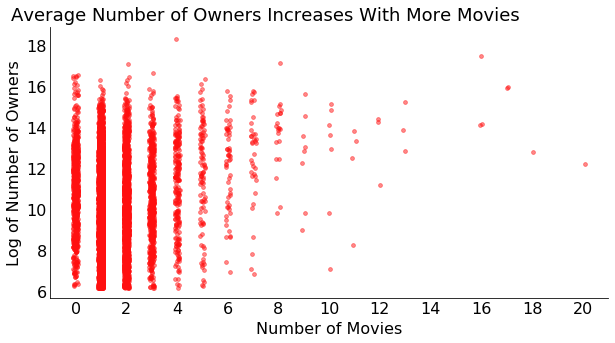

In [52]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='MovieCount', y='SteamSpyOwnersLog', data=MovieScreenshotPrice_df, s=15, alpha=0.5, color='#FF1010', edgecolor=None)
plt.xlabel("Number of Movies", fontsize = 16) 
plt.ylabel("Log of Number of Owners", fontsize = 16) 
plt.title("Average Number of Owners Increases With More Movies", x=-0.07, loc='left', fontsize = 18) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both', which='both',length=0, labelsize=16)
ax.set_xticks(range(0, 21, 2))
ax.set_xticklabels(range(0, 21, 2))

dots = ax.collections[-1]
offsets = dots.get_offsets()
jittered_offsets = offsets + np.random.uniform(-0.1, 0.1, offsets.shape)
dots.set_offsets(jittered_offsets)

plt.show()


## ScreenshotCount Univariate Analysis

We plotted the number of games correspondent to the number of screenshots displayed on the Steam website. The plot shows that most games in the dataset have between 5 and 20 screenshots on their Steam pages. There are some games with many screenshots on their Steam website, which makes the distribution of the number of screenshots heavily skewed to the right.

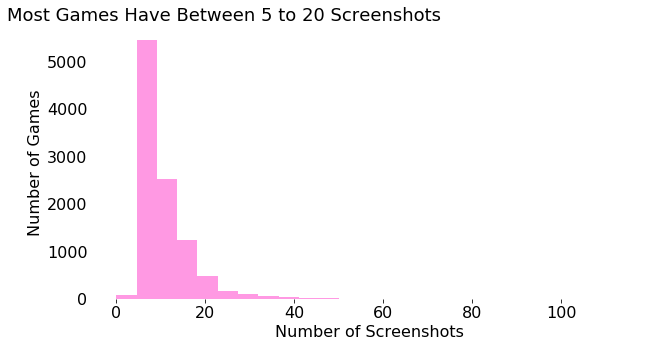

In [53]:
plt.figure(figsize=(10,5))
ax = sns.distplot(MovieScreenshotPrice_df['ScreenshotCount'], bins=25, kde=False, color='#FF00BA')
plt.title('Most Games Have Between 5 to 20 Screenshots', x= -0.15,loc='left',fontsize = 18)
plt.xlabel('Number of Screenshots',fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

## Is there an association between the number of screenshots and the popularity of the game?

By plotting the scatterplot of the number of screenshots and log number of owners, we do not find a clear association between the two variables. Therefore, it would be difficult to determine the number of owners a game has based only on the number of screenshots a game has. 

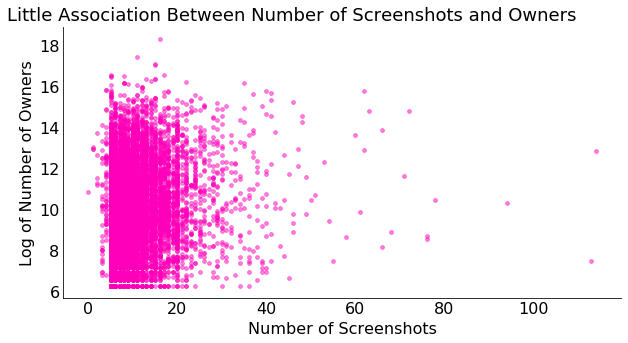

In [54]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='ScreenshotCount', y='SteamSpyOwnersLog', data=MovieScreenshotPrice_df, s=15, color='#FF00BA', alpha=0.5, edgecolor=None)
plt.xlabel("Number of Screenshots", fontsize = 16) 
plt.ylabel("Log of Number of Owners", fontsize = 16) 
plt.title("Little Association Between Number of Screenshots and Owners",x= -0.1,loc='left',fontsize = 18) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.show()


## PriceFinal Univariate Analysis

The distribution of game prices shows that most games in our dataset are less than 20 dollars. Since there are some games that have prices greater than 40 dollars, the distribution is right skewed. 

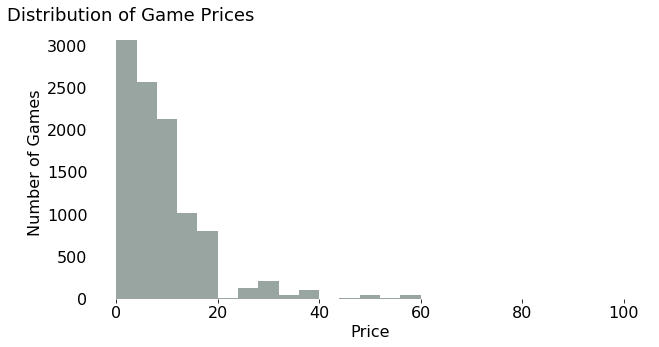

In [55]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df['PriceFinal'], bins=25, kde=False, color='#001F14')
plt.title('Distribution of Game Prices',x= -0.15,loc='left', fontsize = 18)
plt.xlabel('Price',fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

The prices of games tends to be multiples of five or ten. For example, there are clear clusters of games for prices between 25 and 60 dollars. 

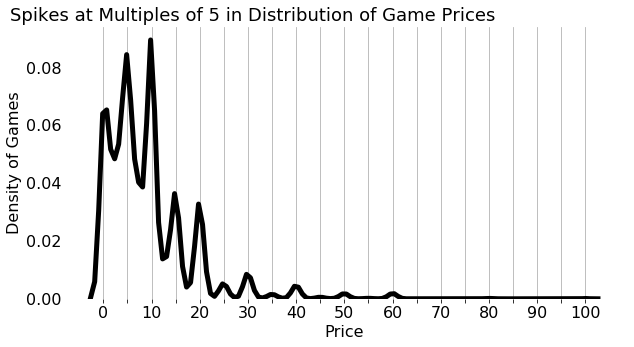

In [96]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df['PriceFinal'], bins=100, hist=False, color='#000000', kde_kws=dict(linewidth=5))
plt.title('Spikes at Multiples of 5 in Distribution of Game Prices', x=-0.1, loc='left',fontsize = 18)
plt.xlabel('Price',fontsize = 16)
plt.ylabel('Density of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both',length=0)
ax.tick_params(axis='both', which='both', labelsize=16)
ax.xaxis.grid(True)
ax.set_xticks(range(0, 101, 5))
ax.set_xticklabels(range(0, 101, 5))
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False) 
plt.show()


## Is there an association between the price of a game and its popularity?

The scatterplot of game final prices and the log number of game owners shows little association between the two variables. However, we do see that the maximum log of game owners decreases as prices of game increases.

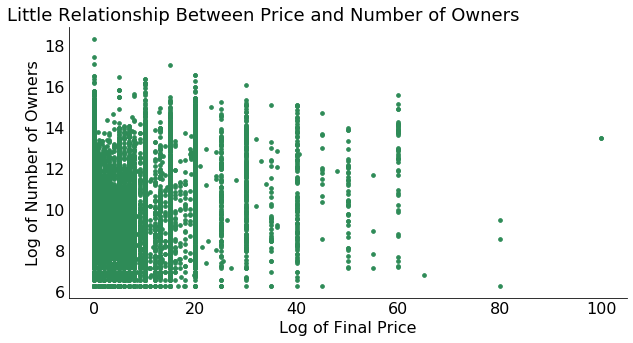

In [57]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='PriceFinal', y='SteamSpyOwnersLog', data = df, s=15, color='#2E8B57', edgecolor=None)
plt.xlabel("Log of Final Price", fontsize = 16) 
plt.ylabel("Log of Number of Owners", fontsize = 16) 
plt.title("Little Relationship Between Price and Number of Owners",x= -0.11,loc='left',fontsize = 18) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)

plt.show()


## Predict Popularity of Games Using Different Features that Game Developers Can Control

- Labeled a game as popular or not popular by comparing log number of game owners with average log number of owners of 10. If log of game owners is larger than 10, then the game is popular, otherwise the game is not popular
- Built DecisionTreeClassifier, LogisticRegression, Support Vector Machine, and KNN with different number of neighbors
- Fitted each model with features that game developers can control separately, such as genres, platforms supported, free version availability, categories, price, screenshot, moviecount columns
- Took the maximum test score by each model and the corresponding train score
- Compared those test scores by models fitted on different features to determine which feature that developers can control best labels the popularity of games

In [58]:
y = df['SteamSpyOwnersLog'] > 10

**quant_cols** - Columns of numeric values

**X** - Dataframe of features that developers can control

In [59]:
quant_cols = ['SteamSpyOwners', 'SteamSpyOwnersLog', 'GenreIsNonGame', 'ReleaseMonth', 'ReleaseYear', 
                       'ReleaseDate', 'Metacritic', 'RecommendationCount']
X = df.drop(columns = quant_cols)

In [60]:
free_cols = ['IsFree', 'FreeVerAvail']
platform_cols = ['PlatformWindows', 'PlatformLinux', 'PlatformMac']
cat_cols = [genre_cols, free_cols, platform_cols, category_cols[:-2], ['ReleaseQuarter'],
            ['PriceFinal'], ['ScreenshotCount'], ['MovieCount']]

In [61]:
# Split dataframe of features game developers control and popularity labels into train and test partitions
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [62]:
# Store maximum test scores by models fitted on features that developers can control
max_test = []
# Store the corresponding train scores of maximum test scores
max_test_train = []
# Iterate over different categorical columns
for col in cat_cols:
    # Create SVM, Logistic Regression, DecisionTree Models
    svm = SVC(kernel = 'linear', C = 0.025, random_state = 101)
    lr = LogisticRegression()
    dtree = DecisionTreeClassifier(max_depth = 7)
    agg_models = [lr, dtree, svm]
    model_names = ['lr', 'dtree', 'svm']
    # Create KNN models of 1 to 20 neighbor(s)
    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = i)
        model_names.append('knn' + str(i))
        agg_models.append(knn)
    # Store the test scores by all models    
    train_lst = []
    # Store the train scores by all models
    test_lst = []
    # Iterate over all models
    for i in range(len(agg_models)):
        # fit the model with train data
        model = agg_models[i]
        model.fit(x_train[col], y_train)
        train_lst.append(model.score(x_train[col], y_train))
        test_lst.append(model.score(x_test[col], y_test))
    # append the maximum test score
    max_test.append(np.max(test_lst))
    # append the corresponding train score of maximum test score
    max_test_train.append(train_lst[test_lst.index(np.max(test_lst))])

In [63]:
# Present the score in a dataframe
joined_scores = pd.DataFrame({'Train Score': max_test_train, 'Test Score': max_test}, 
                             index = ['Genres', 'Free', 'Platforms', 'Categories', 'ReleaseQuarter',
                                      'Price', 'Screenshot', 'MovieCount'])
joined_scores

,Train Score,Test Score
Genres,0.646432,0.654890
Free,0.586009,0.590121
Platforms,0.534558,0.536474
Categories,0.581803,0.594374
ReleaseQuarter,0.526006,0.527314
Price,0.613487,0.611057
Screenshot,0.563998,0.562643
MovieCount,0.582924,0.591102


## Can we label the game as being more popular or less popular than average using developer-controllable features?

The score dataframe above shows that the accuracy of predicting the popularity of games using genres is 0.654890 and is highest, while accuracy of predicting popularity using platform feature is lowest and it is 0.527314. By observing these scores, we could conclude that genres of a game are the best predictor of its popularity and the platform a game supports does not help predict the popularity of game. 

# Genre that Best Predicts a Game's Popularity

Since genres of a game are the best predictor of a game's popularity among all features developers can control, we want to find out which genre best predicts a game's popularity. So, we compared test scores by all models fitted on each genre column.

In [64]:
# Split dataframe of genre columns and popularity labels into train and test partitions
x_train, x_test, y_train, y_test = train_test_split(X[genre_cols], y, test_size = 0.3)

In [65]:
# Store maximum test scores by models fitted on each genre column
max_test = []
# Store the corresponding train scores of maximum test scores
max_test_train = []
# Iterate over genre columns
for col in genre_cols:
    # Create SVM, Logistic Regression, DecisionTree Models
    svm = SVC(kernel = 'linear', C = 0.025, random_state = 101)
    lr = LogisticRegression()
    dtree = DecisionTreeClassifier(max_depth = 7)
    agg_models = [lr, dtree, svm]
    model_names = ['lr', 'dtree', 'svm']
    # Create KNN models of 1 to 20 neighbor(s)
    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = i)
        model_names.append('knn' + str(i))
        agg_models.append(knn)
    # Store the test scores by all models    
    train_lst = []
    # Store the train scores by all models
    test_lst = []
    for i in range(len(agg_models)):
        model = agg_models[i]
        # fit the model with train data
        model.fit(np.array(x_train[col]).reshape(-1,1), y_train)
        train_lst.append(model.score(np.array(x_train[col]).reshape(-1,1), y_train))
        test_lst.append(model.score(np.array(x_test[col]).reshape(-1,1), y_test))
    # append the maximum test score
    max_test.append(np.max(test_lst))
    # append the corresponding train score of maximum test score
    max_test_train.append(train_lst[test_lst.index(np.max(test_lst))])

In [66]:
joined_scores = pd.DataFrame({'Train Score': max_test_train, 'Test Score': max_test},
                             index = genre_cols).sort_values(by = 'Test Score', ascending = False)
joined_scores

,Train Score,Test Score
GenreIsFreeToPlay,0.570167,0.588485
GenreIsIndie,0.582223,0.573765
GenreIsMassivelyMultiplayer,0.537502,0.555774
GenreIsRPG,0.534558,0.554465
GenreIsCasual,0.548016,0.548250
GenreIsStrategy,0.537362,0.543343
GenreIsAction,0.522922,0.534511
GenreIsAdventure,0.522922,0.534511
GenreIsSimulation,0.522922,0.534511
GenreIsEarlyAccess,0.522922,0.534511


## Which developer-controllable feature gives the best prediction of popularity of a game?

The score dataframe above shows that accuracy of predicting a game's popularity using **GenreIsIndie** is the highest. It means that whether a game's genre is Indie or not can best helps us predict game's popularity. However, prediction accuracy using each single genre is only slightly higher than the random chance. In other words, predicting a game's popularity using exclusively one genre is not very useful.

# Predicting Popularity of Game Using All Features Developers Can Control

Here, we are interested in exploring how accurate all developer-controllable features predict popularity of games. 

In [67]:
# Split dataframe of features developers control and popularity labels into train and test partitions
x_train, x_test, y_train, y_test = train_test_split(X , y)

In [68]:
models = {}
# Create SVM, Logistic Regression, DecisionTree and KNN models
lr = LogisticRegression()
dtree = DecisionTreeClassifier(max_depth = 7)
svm = SVC(kernel = 'linear', C = 0.025, random_state = 101)
models = {'lr': lr, 'dtree': dtree, 'svm': svm}
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    models['knn' + str(i)] = knn

In [69]:
# fitting and predicting
scores = pd.DataFrame(columns=['ModelName', 'TrainScore', 'TestScore'])
for key in models:
    model = models[key]
    model.fit(x_train, y_train)
    scores = scores.append({'ModelName': key,
                            'TrainScore': model.score(x_train, y_train),
                            'TestScore': model.score(x_test, y_test)},
                            ignore_index=True)

## How accurate can we predict the popularity of games using all developer-controllable features?

The highest prediction accuracy we get from running **scores['TestScore'].max()** is 0.68, which means that using all developer-controllable features, we can accurately predict the popularity of approximately 68% of games. Therefore, it is still helpful to use those features to predict games' popularity.

# **Using RecommendationCountLog to Predict SteamSpyOwnersLog**

After observing a clear linear relationship between the log of recommendation count and the log number of games owners, we want to use log recommendation count to predict the log number of owners a game will have. In our hypotheses, we predicted that a game with more recommendations is more popular or has more owners, so we want to check how strong the relationship between the two variables is. Here, we used linear regression and quantile regression to answer our question. 

In [70]:
recommendation_log_df = df[df['RecommendationCount'] > 0]
recommendation_log_df['RecommendationCountLog'] = np.log(recommendation_log_df['RecommendationCount'])

**Check Conditions and Assumptions for Performing Linear Regression**

**Assumptions**
- Since there are various games in the dataset and one game does not have significant influence on the popularity of another game, we assume that games are independent to perform regression prediction, even though complete independence between games is not always true in the real world.
- Since we only have one independent variable, there is no multicollinearity issue.

**Condition 1**: Plot is linear

After plotting the scatterplot of the log of recommendation count and the log of games owners, we see that the relationship between the two variable is relatively linear. However, the variability of the data changes, our distribution is not homoscedastic, so we should not use linear regression.

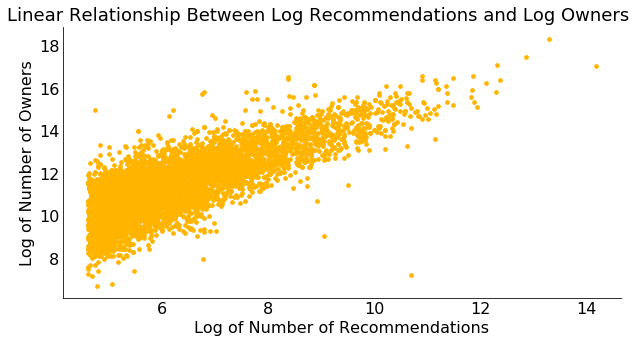

In [71]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='RecommendationCountLog', y='SteamSpyOwnersLog', data=recommendation_log_df, s=15, color='#FFB400',
                    edgecolor = None)
plt.title('Linear Relationship Between Log Recommendations and Log Owners',x= -0.1,loc='left', fontsize=18)
plt.xlabel('Log of Number of Recommendations', fontsize = 16)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.show()

**Condition 2**: Data is normally distributed

While the log of game owners is roughly normally distributed, the log of recommendation counts is heavily skewed to the right. Therefore, linear regression is not the best model to fit on our data and perform prediction. 

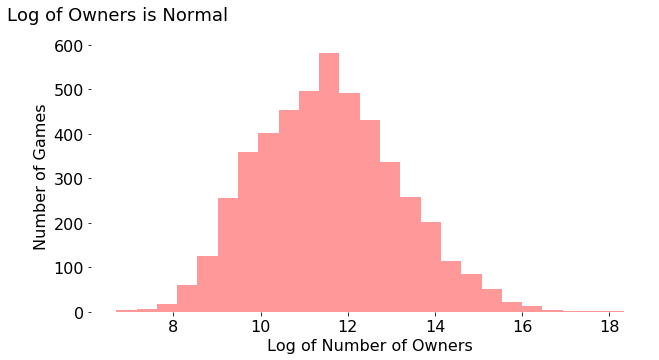

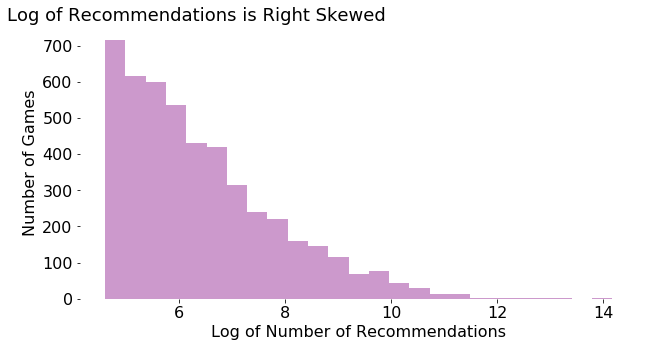

In [72]:
plt.figure(figsize=(10,5))
ax = sns.distplot(recommendation_log_df['SteamSpyOwnersLog'], bins=25, kde=False, color='red')
plt.title('Log of Owners is Normal',x= -0.15,y = 1.05,loc='left', fontsize = 18)
plt.xlabel('Log of Number of Owners', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.distplot(recommendation_log_df['RecommendationCountLog'], bins=25, kde=False, color='purple')
plt.title('Log of Recommendations is Right Skewed', x= -0.13,loc='left',fontsize = 18)
plt.xlabel('Log of Number of Recommendations', fontsize = 16)
plt.ylabel('Number of Games', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

# **Using Quantile Regression For RecommendationCountLog and SteamSpyOwnersLog**

Since RecommendationCountLog does not have a normal distribution, we perform a quantile regression instead. This way, our data doesn't have to follow conditions mentioned above. Moreover, we would be able to gain an understanding of the changing variability between the two variables. 

In quantile regression, we use ten different quantiles and plot multiple regression lines based on the different quantiles of the data. This allows us to form a prediction interval with varying degrees of accuracy. 

**Performing Quantile Regression**

**Summary Statistic of Least Absolute Deviation**

This following table contains the intercept and slope of the regression line for the median of our data, or quantile = 0.5. 

We found that the regression line follows the following equation: **SteamSpyOwnersLog = 5.8126 + 0.8956 * RecommendationCountLog**

In [73]:
mod = smf.quantreg('SteamSpyOwnersLog ~ RecommendationCountLog', recommendation_log_df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:      SteamSpyOwnersLog   Pseudo R-squared:               0.3929
Model:                       QuantReg   Bandwidth:                      0.2982
Method:                 Least Squares   Sparsity:                        2.771
Date:                Wed, 16 Dec 2020   No. Observations:                 4775
Time:                        15:41:50   Df Residuals:                     4773
                                        Df Model:                            1
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.8156      0.091     63.571      0.000       5.636       5.995
RecommendationCountLog     0.8953      0.014     64.489      0.000       0.868       0.922


**Creating DataFrame of Intercepts and Coefficients**

Here we calculate the interecept and coefficients of each quantile from 0.05 to 0.95 with an interval of 0.1. 

**models** - DataFrame containing our relevant information for quantile regression

**quantile** - (float) Quantile corresponding to the equation

**intercept** - (float) Intercept of the regression line

**coef** - (float) Coefficient/Slope of regression line

In [74]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['RecommendationCountLog']] + \
            res.conf_int().loc['RecommendationCountLog'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['quantile', 'intercept', 'coef', 'lb', 'ub'])

ols = smf.ols('SteamSpyOwnersLog ~ RecommendationCountLog', recommendation_log_df).fit()
ols_ci = ols.conf_int().loc['RecommendationCountLog'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           coef = ols.params['RecommendationCountLog'],
           lb = ols_ci[0],
           ub = ols_ci[1])

# a is the intercept and b is the coefficient

# print(models)
# print(ols)

**Plot out Quantile Regression**

We plot out the regression lines of each quantile defined above and the ordinary least squares (OLS) regression line to see the relationship between RecommendationCountLog and SteamSpyOwnersLog. 

Quantile regression allows us to use a prediction interval to represent the range of possible values of log number of owners predicted based on log number of recommendations.

The highlighted OLS regression line in blue is the 50th quantile regression line and considers the median of our data. 

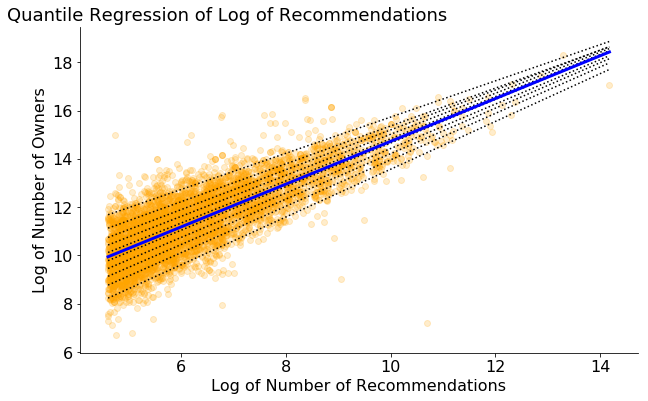

In [75]:
recommendation_log_min = recommendation_log_df.RecommendationCountLog.min()
recommendation_log_max = recommendation_log_df.RecommendationCountLog.max()
x = np.arange(recommendation_log_min, recommendation_log_max+0.1, (recommendation_log_max - recommendation_log_min) / 10)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(models.shape[0]):
    y = get_y(models.intercept[i], models.coef[i])
    ax.plot(x, y, linestyle='dotted', color='black')

y = get_y(ols['intercept'], ols['coef'])

ax.plot(x, y, color='blue', label='Ordinary Least Squares', linewidth = 3)
ax.scatter(recommendation_log_df.RecommendationCountLog, recommendation_log_df.SteamSpyOwnersLog, alpha=.2, color='orange')
ax.set_title('Quantile Regression of Log of Recommendations',x= -0.13, loc='left', fontsize=18)
ax.set_xlabel('Log of Number of Recommendations', fontsize=16)
ax.set_ylabel('Log of Number of Owners', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

**Quantile Regression Equations for Each Quantile**

By calculating the regression equations for each quantile defined above, we can create prediction intervals.

x = RecommendationCountLog

y = SteamSpyOwnersLog

In [76]:
# Used to get the equations of each quantile regression
# for i in range(models.shape[0]):
#   row = models.iloc[i]
#   print('{0}th Quantile: y = {1} + {2}x'.format(int(row['quantile'] * 100), row['intercept'].round(4), row['coef'].round(4)))

**Median 50th Quantile**: y = 5.8126 + 0.8956x

5th Quantile: y = 3.6587 + 0.9911x

15th Quantile: y = 4.3256 + 0.9633x

25th Quantile: y = 4.7892 + 0.9421x

35th Quantile: y = 5.2046 + 0.9222x

45th Quantile: y = 5.6086 + 0.9047x

55th Quantile: y = 6.0892 + 0.8742x

65th Quantile: y = 6.504 + 0.8513x

75th Quantile: y = 6.9274 + 0.8272x

85th Quantile: y = 7.5074 + 0.7853x

95th Quantile: y = 8.2199 + 0.751x

Accounting for 90 percent of our data, the prediction interval is between the 5th and 95th quantile regression lines. Our resulting prediction interval of the log number of owners based on the log number of recommendations falls in \[3.6587 + 0.9911x, 8.2199 + 0.751x\].

Compared to linear regression, quantile regression is better to use because of heteroscedasticity in our data. It helps us make prediction intervals and hence we can use them to find possible range of the log number of owners. However, this regression does not allow us to make a specific prediction of log number of owners. 

# **Using Metacritic Score to Predict SteamSpyOwnersLog**

We also want to see if metacritic score can be used to predict the log number of owners a game has. We find some positive correlation between the two variables. Therefore, we use regression to mathematically compute this relationship.

First we'll use linear regression and then use quantile regression and compare the two results. 

**Check Conditions For Linear Regression**

**Assumptions**
- We assume that games in the dataset are independent for the same reason mentioned in the linear regression conditions for RecommendationCountLog above.
- There is no multicollinearity since there is only one predictor variable. 

**Condition 1**: Data is normally distributed

The distribution of metacritic score is relatively normally distributed with a slight left skew. We know that the distribution of the log of number of owners is also relatively normal from analysis done above.  

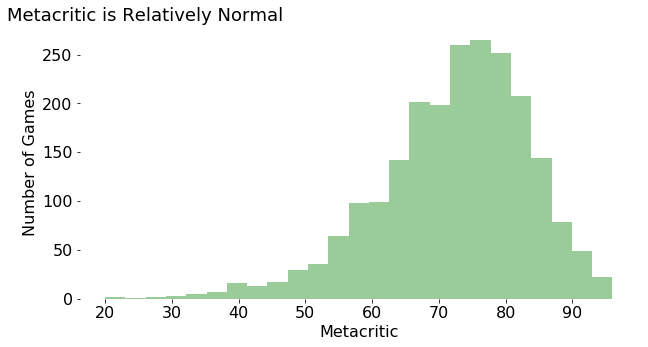

In [77]:
plt.figure(figsize=(10,5))
ax = sns.distplot(metacritic_df['Metacritic'], bins=25, kde=False, color='green')
plt.title('Metacritic is Relatively Normal', x= -0.13, loc='left',fontsize = 18)
plt.xlabel('Metacritic', fontsize = 16)
plt.ylabel('Number of Games',fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

**Condition 2**: Plot is linear / Residual Plot is Random

The scatterplot does show a slight positive correlation between two variables, even though the relationship between them is not very linear. However, the variability of data points increases as metacritic increases. Therefore, the data is not homoscedastic.

In [78]:
metacritic_df = df[df['Metacritic'] > 0]

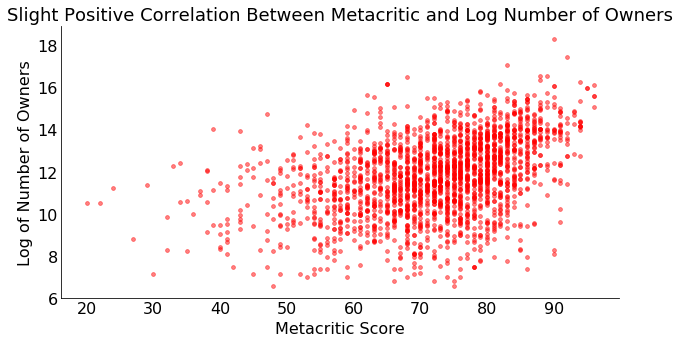

In [79]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Metacritic', y='SteamSpyOwnersLog', data=metacritic_df, s=15, color='red', edgecolor = None, alpha = 0.5)
plt.title('Slight Positive Correlation Between Metacritic and Log Number of Owners', fontsize=18)
plt.xlabel('Metacritic Score', fontsize = 16)
plt.ylabel('Log of Number of Owners', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.show()

**Condition 2**: Randomness in Residual Plot

The residual plot also shows heteroscedasticity of our data as the variability of residuals increases as metacritic score increases. There is also a cluster of points with metacritic scores larger than 50. Therefore, using a linear regression is not the best regression model to show the relationship between metacritic score and log of number of owners.

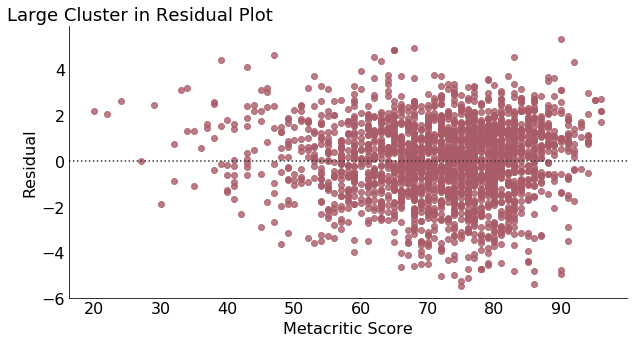

In [80]:
plt.figure(figsize=(10,5))
ax = sns.residplot(data=metacritic_df, x='Metacritic', y='SteamSpyOwnersLog', color='#A95C68')
plt.title('Large Cluster in Residual Plot', x= -0.11,loc='left', fontsize = 18)
plt.xlabel('Metacritic Score', fontsize=16)
plt.ylabel('Residual', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both',length=0, labelsize=16)
plt.show()

# **Using Quantile Regression for Metacritic Score and SteamSpyOwnersLog**

Since our data does not meet the condition of homoscedasticity, we use quantile regression instead of linear regression to see if there is a relationship between metacritic score and log of number of game owners.

**Performing Quantile Regression**

**Summary Statistic of Least Absolute Deviation**

The following table contains the intercept and slope of the regression line for the median of our data, or quantile = 0.5.

We found that the regression line follows the following equation: **SteamSpyOwnersLog = 6.2777 + 0.0784 * Metacritic**

In [81]:
mod = smf.quantreg('SteamSpyOwnersLog ~ Metacritic', metacritic_df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:      SteamSpyOwnersLog   Pseudo R-squared:               0.1005
Model:                       QuantReg   Bandwidth:                      0.6132
Method:                 Least Squares   Sparsity:                        4.131
Date:                Wed, 16 Dec 2020   No. Observations:                 2212
Time:                        15:41:52   Df Residuals:                     2210
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2777      0.287     21.873      0.000       5.715       6.840
Metacritic     0.0784      0.004     19.921      0.000       0.071       0.086


**Creating DataFrame of Intercepts and Coefficients**

We calculate the intercept and coefficients of each quantile from 0.05 to 0.95 with an interval of 0.1. 


**models** - DataFrame containing our intercept and coefficient for quantile regression

**quantile** - (Float) Quantile corresponding to the regression

**intercept** - (Float) Intercept of the regression line

**coef** - (Float) Coefficient/Slope of regression line

In [82]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Metacritic']] + \
            res.conf_int().loc['Metacritic'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['quantile', 'intercept', 'coef', 'lb', 'ub'])

ols = smf.ols('SteamSpyOwnersLog ~ Metacritic', metacritic_df).fit()
ols_ci = ols.conf_int().loc['Metacritic'].tolist()
ols = dict(intercept = ols.params['Intercept'],
           coef = ols.params['Metacritic'],
           lb = ols_ci[0],
           ub = ols_ci[1])

# print(models)
# print(ols)

**Plot out Quantile Regression**

We plot the regression lines for each quantile to see if there is a relationship between Metacritic and SteamSpyOwnersLog. 

The highlighted OLS regression line in blue is the 50th quantile regression line and considers the median of our data.


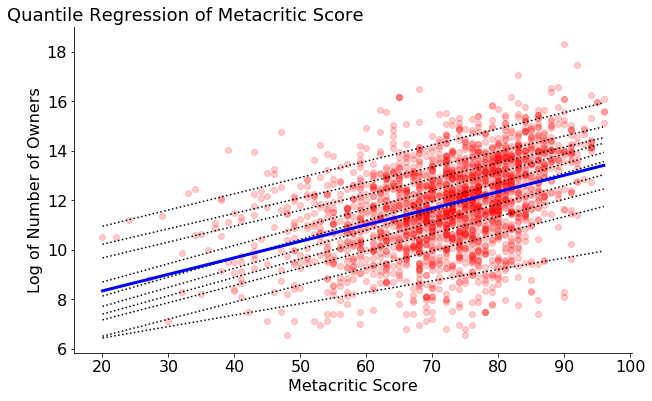

In [83]:
metacritic_min = metacritic_df.Metacritic.min()
metacritic_max = metacritic_df.Metacritic.max()
x = np.arange(metacritic_min, metacritic_max+1, (metacritic_max - metacritic_min) / 10)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(models.shape[0]):
    y = get_y(models.intercept[i], models.coef[i])
    ax.plot(x, y, linestyle='dotted', color='black')

y = get_y(ols['intercept'], ols['coef'])

ax.plot(x, y, color='blue', label='Ordinary Least Squares', linewidth = 3)
ax.scatter(metacritic_df.Metacritic, metacritic_df.SteamSpyOwnersLog, alpha=.2, color='red')
ax.set_title('Quantile Regression of Metacritic Score', x= -0.12,loc='left', fontsize=18)
ax.set_xlabel('Metacritic Score', fontsize=16)
ax.set_ylabel('Log of Number of Owners', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=16)
plt.show()

**Quantile Regression Equations for Each Quantile**

We can create regression equations for each quantile we calculated. Now that we have an equation for each quantile, we can create a prediction interval.

x = Metacritic

y = SteamSpyOwnersLog

In [84]:
# for i in range(models.shape[0]):
#   row = models.iloc[i]
#   print('{0}th Quantile: y = {1} + {2}x'.format(int(row['quantile'] * 100), row['intercept'].round(4), row['coef'].round(4)))

**Median 50th Quantile**: y = 6.2777 + 0.0784 * x

5th Quantile: y = 5.5123 + 0.0462x

15th Quantile: y = 5.1287 + 0.069x

25th Quantile: y = 5.7773 + 0.0696x

35th Quantile: y = 5.9183 + 0.0742x

45th Quantile: y = 6.1737 + 0.077x

55th Quantile: y = 6.6054 + 0.0764x

65th Quantile: y = 7.2236 + 0.0738x

75th Quantile: y = 8.3953 + 0.064x

85th Quantile: y = 8.9725 + 0.0625x

95th Quantile: y = 9.6393 + 0.0657x

Accounting for 90 percent of our data, the prediction interval is between the 5th and 95th quantile regression lines. Our resulting prediction interval of the log number of owners based on metacritic score falls in \[5.5123 + 0.0462x, 9.6393 + 0.0657x\]. Since the correlation coefficient is close to 0 and is between 0.0462 and 0.0784, there is no correlation between the two variables. Hence, we should not use metacritic score to predict the log number of games oweners.

# Ethics & Privacy

The github page that provides this dataset states that this dataset is usable for research purposes and is under MIT license. Therefore, we have permission to use this dataset for this project. We got our data through publicly available dataset https://data.world/craigkelly/steam-game-data. Also, we are confident that this data is accurate because it was created from Steam's API. If others want to use this dataset, the link to the dataset is provided so other people would have access to it. Since our dataset does not include any personal information about individual game players, we mitigate the privacy issue with our dataset. Because the data is collected directly from steam platforms and is not submitted by game players, we believe that there are no potential biases in the process of collecting data.
 
In our analysis, we should be aware of spurious correlations and be cautious when drawing causations between game features and the popularity of games. Moreover, we should consider whether the popularity of steam games affects the features we are studying. In the machine learning section, we should clearly explain what classification and regression models we use and what features are analyzed. If some companies decide to use our project as the reference when making a video game, we should be aware that they might make decisions about what type of video games to produce based on conclusions of our project.

Since this dataset contains players' reactions to various games, people who could benefit from our data analysis are game developers and game marketers, especially those who want to increase their games’ popularity. For example, a game developer can choose which genres or categories to include so that their games are more likely to be popular. A marketing team for a game can check how the number of movies and recommendations can be associated with popularity of games. Eventually, it is possible that our machine learning models could predict an estimate of how many owners there are for a game just by looking at certain features of the respective games.


# Conclusion & Discussion

**Summary**

From our data analysis of Steam Games, we found several expected correlations. The game’s metacritic score is only slightly positively correlated with the game’s popularity. We found a stronger positive correlation between the number of recommendations and the number of game owners.
Although we hypothesized that older games would be less popular, we actually found a positive correlation between a game’s age and the game ownership. The reason might be that older games have a longer time to accumulate more players, whereas newer games don’t have as much time to gain more players. 

Additionally, we found that most games in the dataset fall under the Indie, Action, and Adventure genres while much fewer games fall under the Sports, Racing, and Massively Multiplayer genres. Despite this pattern we found in our data, we also found that the least abundant games had the highest average game ownership. While games that are in the Massively Multiplayer genre have one of the lowest count of games, it has one of the highest average owner count per Massively Multiplayer game. Genres such as Indie and Casual had much more games, yet had a lower average number of owners compared to the rest of the genres. 
We also found a general trend in popularity between games that were and were not free. Generally, games that were free tended to have more owners overall compared to games that weren’t free. We also expected this because free games might attract more players because people enjoy getting more free things than paying for it.

However, we unexpectedly found little to no correlation between the platforms a game supported and the games popularity. Games that supported Mac and Linux in addition to Windows were not significantly different in their number of owners compared to games that just supported Windows. 

After exploring our data, we created a classification model using genres, categories, whether the game was free, platforms the game supports, final price, number of screenshots, number of movies, and release quarter to predict whether a game would be popular or not popular based on if it was higher or lower than the average log number of owners. Using all of these features, our model was able to predict whether a game was popular with a sixty-eight percent accuracy. Compared to the other features we used in our classification model, the genre of a game was the best predictor to whether a game was more popular than the average game. Out of all the genres, Indie was the most accurately predicted genre on whether a game was popular, although we can not determine in which direction in our classification. 

We also created a quantile regression model using the log of recommendation count and metacritic score separately to predict the log of owner counts. By using a quantile regression, we were able to account for a large majority of the variability that we saw in our graphs. The quantile regression between the log of recommendation count and the log of steam owners had a clear positive correlation, and with the regression lines we calculated, we can use a prediction interval to predict the range of owners of a game given the recommendation count of that game. We saw a similar pattern with the quantile regression between metacritic score and the log of steam owners, however the positive correlation wasn’t as strong. We could still predict the number of owners for a game given the metacritic score of that game with a similar prediction interval derived from the regression lines we calculated for the plot. 

**Discussion**
For our univariate analysis of the number of game owners, we used the log of game owners (SteamSpyOwnersLog) instead of the actual number of owners (SteamSpyOwners) since the distribution of log of owners is more normally distributed than the distribution of raw count of owners. However, in our Exploratory Data Analysis, we used the averaged raw number owners to discover the relationship between popularity of games and game features, as raw number of owners is easier to understand than log numbers.

**Limitations and Bias**
There are some potential confounding factors that could affect some results in our data analysis. One is the release date of the game. Since technology is more accessible currently than ten years ago, much more games have been developed since 2015 and hence our dataset contains more recent games. Additionally, we used SteamSpyOwners to define popularity. SteamSpyOwners measures the number of owners of the game over the entire lifetime of the game. As a result, if a game is released earlier, it has a longer time to accumulate more game ownership. Developers might be more interested in popularity measured in the first year, for example. Because of these reasons, association between release date and popularity of games might be spurious.

Another confounding factor in our data is the existence of E3, or the Electronic Entertainment Expo, which is the largest annual gaming convention held every June. At this convention, game publishers and developers would advertise their upcoming games. In our dataset, we see a huge decrease in the number of games being released around June, which corresponds to the hosting of this event. This could be because game developers do not want their games to compete with games featured at the E3 convention, which already have a more widespread audience or fan base from this massive event.

Another limitation to our data analysis concerns the practical use of what we predict using the timing of games. For example, if our analysis discovers a spike in a certain game genre in 2010, game developers could not use this information to their advantage, because it is impossible to release games in past years.

# Team Contributions
We divided our tasks based on the columns and the features that we want to analyze. Each member of the team worked on several columns and features, including dataset analysis, machine learning. Here are the specific contributions that each team member had:

### Nathan Ng
- Performed data analysis and generated visual plots for RecommendationCount, IsFree, and FreeVerAvail from Steam Games dataset
- Explored the relationship between RecommendationCount, IsFree, and FreeVerAvail with SteamSpyOwners
- Performed linear regression and quantile regression for RecommendationCount and Metacritic in relation to SteamSpyOwners. 
- Generated visual plots and completed an analysis of the regression plots
- Worked on revising research question, hypothesis, and dataset description
- Added more resources and background knowledge to our background and prior work section
- Cleaned data visualizations and edited colors 

### Melchisedec Lee
- Worked on analysis for MovieCount, ScreenshotCount, PriceFinal
- Polished data analysis and data visualization
- Contributed to the Final Report’s Overview, Hypothesis, Ethics & Privacy, Conclusion & Discussion sections


### Duy Pham
   - Performed data analysis for platform data
   - Gave general advice on analysis such as removing games with 0 SteamSpyOwners, applying log transformations to skewed data ect
   - Reviewed everyone else’s data analysis


### Pudan Xu
   - Worked on Categories ('CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport'), and performed Category columns data analysis and machine learning
   - Polished data analysis and machine learning codes and plots based on other team members’ suggestions
   - Contributed to Hypothesis, Dataset, and Ethics & Privacy sections


### Yunchun Pan
   - Scheduled weekly meeting and demonstrated how to perform Machine Learning, Data Analysis on each feature
   - Performed data analysis for ReleaseDate, Metacritic, Genre columns('GenreIsIndie', 'GenreIsAction','GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer') in the dataset
   - Gave advice on how to polish everyone's data analysis and plots
   - Aggregated everyone's data analysis and machine learning work into Data Analysis, Cleaning, Machine Learning section